Number of unique NACCID's: 2139
Counts for each NACCID:
NACCID
NACC000314    2
NACC000441    4
NACC000766    2
NACC000806    3
NACC000868    1
             ..
NACC998373    2
NACC998701    2
NACC999225    3
NACC999546    1
NACC999573    2
Length: 2139, dtype: int64


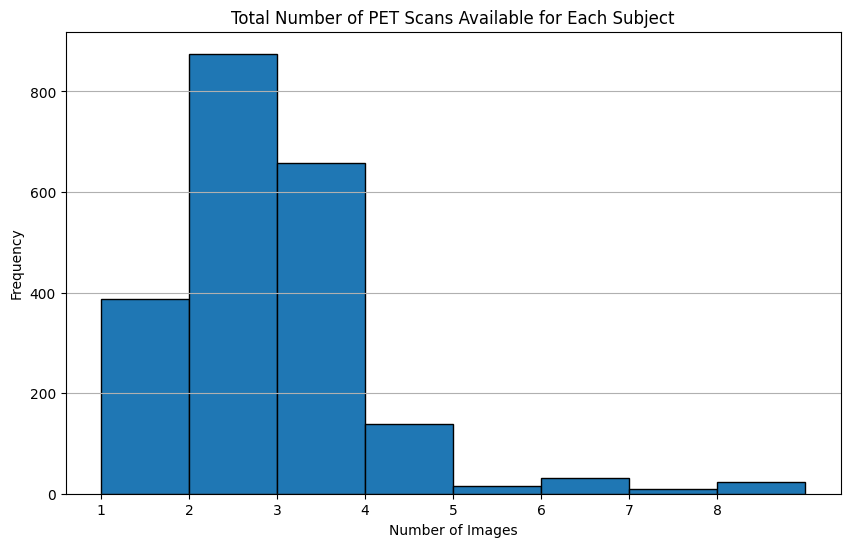

Bin counts:
Number of images 1 - 1: 388
Number of images 2 - 2: 875
Number of images 3 - 3: 658
Number of images 4 - 4: 138
Number of images 5 - 5: 15
Number of images 6 - 6: 31
Number of images 7 - 7: 10
Number of images 8 - 8: 24


In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
def create_imaging_subjects_dataframe(csv_files):
    # List to hold individual DataFrames
    dataframes = []

    # Read each CSV file and append to the list
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Sort the DataFrame by the first column (NACCID)
    combined_df.sort_values(by=combined_df.columns[0], inplace=True)

    return combined_df

# Example usage
csv_files = glob.glob('PET/*.csv')  # Adjust the path as needed
imaging_subjects = create_imaging_subjects_dataframe(csv_files)

# Calculate summary statistics
unique_naccids = imaging_subjects.iloc[:, 0].nunique()
category_counts = imaging_subjects.groupby(imaging_subjects.columns[0]).size()

# Display the summary statistics
print(f"Number of unique NACCID's: {unique_naccids}")
print("Counts for each NACCID:")
print(category_counts)

# Create a histogram of the total number of images available for each NACCID
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(category_counts, bins=range(1, category_counts.max() + 2), edgecolor='black')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Total Number of PET Scans Available for Each Subject')
plt.xticks(range(1, category_counts.max() + 1))
plt.grid(axis='y')
plt.show()

# Print the numeric values for each bin count
print("Bin counts:")
for i in range(len(bins) - 1):
    print(f"Number of images {int(bins[i])} - {int(bins[i+1]) - 1}: {int(counts[i])}")

Number of unique NACCID's: 2608
Counts for each NACCID:
NACCID
NACC000176    1
NACC000314    1
NACC000806    1
NACC000868    2
NACC001129    1
             ..
NACC997536    1
NACC997756    1
NACC998701    1
NACC999573    1
NACC999821    1
Length: 2608, dtype: int64


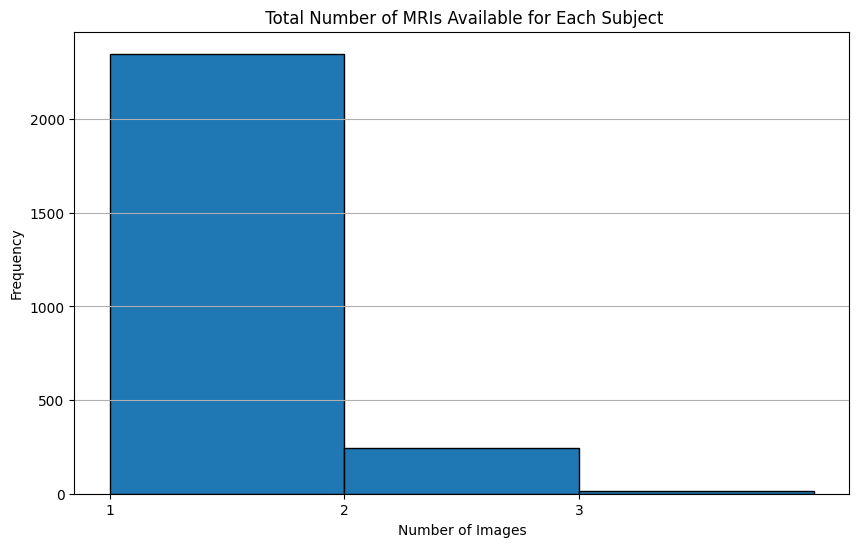

Bin counts:
Number of images 1 - 1: 2349
Number of images 2 - 2: 246
Number of images 3 - 3: 13


In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
def create_imaging_subjects_dataframe(csv_files):
    # List to hold individual DataFrames
    dataframes = []

    # Read each CSV file and append to the list
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Sort the DataFrame by the first column (NACCID)
    combined_df.sort_values(by=combined_df.columns[0], inplace=True)

    return combined_df

def save_unique_naccids_to_csv(df, output_file):
    # Extract unique NACCIDs
    unique_naccids = df.iloc[:, 0].unique()
    
    # Create a DataFrame from the unique NACCIDs
    unique_naccids_df = pd.DataFrame(unique_naccids, columns=['NACCID'])
    
    # Save to CSV
    unique_naccids_df.to_csv(output_file, index=False)
    
# Example usage
csv_files = glob.glob('MRI/*.csv')  # Adjust the path as needed
imaging_subjects = create_imaging_subjects_dataframe(csv_files)

# Calculate summary statistics
unique_naccids = imaging_subjects.iloc[:, 0].nunique()
category_counts = imaging_subjects.groupby(imaging_subjects.columns[0]).size()

# Display the summary statistics
print(f"Number of unique NACCID's: {unique_naccids}")
print("Counts for each NACCID:")
print(category_counts)

# Create a histogram of the total number of images available for each NACCID
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(category_counts, bins=range(1, category_counts.max() + 2), edgecolor='black')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title(' Total Number of MRIs Available for Each Subject')
plt.xticks(range(1, category_counts.max() + 1))
plt.grid(axis='y')
plt.show()

# Print the numeric values for each bin count
print("Bin counts:")
for i in range(len(bins) - 1):
    print(f"Number of images {int(bins[i])} - {int(bins[i+1]) - 1}: {int(counts[i])}")
    
save_unique_naccids_to_csv(imaging_subjects, 'unique_naccids.csv')    

Now I am trying to specifically nail down how many patients have multiple types of pet scans.

In [10]:
import pandas as pd
import glob

def create_imaging_subjects_dataframe(csv_files):
    # List to hold individual DataFrames
    dataframes = []

    # Read each CSV file, add a source column, and append to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['source_file'] = file  # Add a column for the source file
        dataframes.append(df)

    # Concatenate all DataFrames
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Sort the DataFrame by the first column (NACCID)
    combined_df.sort_values(by=combined_df.columns[0], inplace=True)

    return combined_df

def analyze_naccid_sources(combined_df):
    # Group by NACCID and count the number of unique source files
    naccid_source_counts = combined_df.groupby(combined_df.columns[0])['source_file'].nunique()

    # Filter for NACCIDs that appear in more than one file
    multiple_sources = naccid_source_counts[naccid_source_counts > 1]

    return multiple_sources

def summarize_file_representation(combined_df):
    # Count the number of entries from each source file
    file_representation = combined_df['source_file'].value_counts()

    return file_representation
# Example usage
csv_files = glob.glob('PET/*.csv')  # Adjust the path as needed
imaging_subjects = create_imaging_subjects_dataframe(csv_files)

multiple_sources = analyze_naccid_sources(imaging_subjects)
file_representation = summarize_file_representation(imaging_subjects)

# Display the results
print(f"Number of NACCID's with images in more than one file: {len(multiple_sources)}")
print("NACCID's with images in more than one file and the number of files they appear in:")
print(multiple_sources)


print("\nFile representation summary:")
print(file_representation)

Number of NACCID's with images in more than one file: 1724
NACCID's with images in more than one file and the number of files they appear in:
NACCID
NACC000314    2
NACC000441    2
NACC000766    2
NACC000806    3
NACC001129    2
             ..
NACC997756    2
NACC998373    2
NACC998701    2
NACC999225    3
NACC999573    2
Name: source_file, Length: 1724, dtype: int64

File representation summary:
source_file
PET\amyloidpet_npdka.csv    1823
PET\amyloidpet_gaain.csv    1823
PET\taupet_npdka.csv        1082
PET\fdgpet_npdka.csv         459
Name: count, dtype: int64


I am going to look at the amyloid pet gaain and npdka file to see the distribution of how many tracer types there are. 

In [13]:
import pandas as pd

def read_and_filter_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def filter_unique_ids(df):
    unique_ids = df.iloc[:, 0].unique()
    return unique_ids

def filter_by_tracer(df):
    tracer_column = df.columns[5]  # Assuming the 6th column is the tracer column
    return df[tracer_column]

def calculate_statistics(df_list):
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Filter unique NACCIDs
    unique_ids = combined_df.iloc[:, 0].unique()
    
    # Filter by tracer value
    tracer_values = combined_df.iloc[:, 5]
    
    # Count occurrences of each tracer
    tracer_counts = tracer_values.value_counts()
    
    # Identify patients with multiple tracers
    patient_tracer_counts = combined_df.groupby(combined_df.columns[0]).nunique()[combined_df.columns[5]]
    multiple_tracers = patient_tracer_counts[patient_tracer_counts > 1]
    
    return tracer_counts, multiple_tracers

# File paths
file_paths = [
    'PET/amyloidpet_gaain.csv',
    'PET/amyloidpet_npdka.csv'
]

# Read and filter CSV files
dfs = [read_and_filter_csv(file_path) for file_path in file_paths]

# Calculate statistics
tracer_counts, multiple_tracers = calculate_statistics(dfs)

# Print statistics
print("Tracer counts:")
print(tracer_counts)
print("\nPatients with multiple tracers:")
print(multiple_tracers)

Tracer counts:
TRACER
2    1632
4    1254
3     498
5     262
Name: count, dtype: int64

Patients with multiple tracers:
NACCID
NACC175382    2
NACC479295    2
NACC510491    2
Name: TRACER, dtype: int64


I am going to now try to see from the list of valid MRI scans, how many of each subcategory of NACCTMCI there are. 


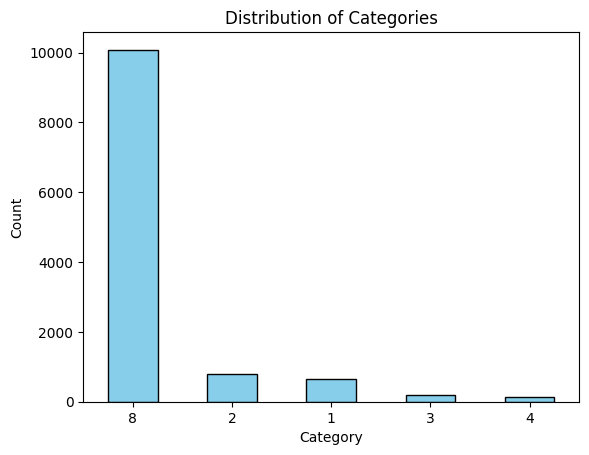

Category counts:
NACCTMCI
8    10080
2      803
1      647
3      201
4      129
Name: count, dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def read_and_extract_columns(file_path, columns):
    df = pd.read_csv(file_path, usecols=columns)
    return df

def filter_by_naccid(df, naccid_list):
    return df[df.iloc[:, 0].isin(naccid_list)]

def count_categories(df, category_column):
    return df[category_column].value_counts()

def visualize_categories(category_counts):
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Distribution of Categories')
    plt.xticks(rotation=0)
    plt.show()

# File paths
file_path_1 = 'uds.csv'  # Adjust the path as needed
file_path_2 = 'MRI\mri.csv'  # Adjust the path as needed

# Read the first CSV file and extract the 1st and 724th columns
columns_to_extract = [0, 587]  
df1 = read_and_extract_columns(file_path_1, columns_to_extract)

# Read the second CSV file to get the list of NACCIDs
df2 = pd.read_csv(file_path_2)
naccid_list = df2.iloc[:, 0].tolist()

# Filter the first DataFrame by the NACCID list
filtered_df = filter_by_naccid(df1, naccid_list)

# Count the occurrences of each category in the 724th column
category_counts = count_categories(filtered_df, filtered_df.columns[1])

# Visualize the category counts
visualize_categories(category_counts)

# Print the category counts
print("Category counts:")
print(category_counts)